In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

## 1st exercise

In [2]:
#getting the data from the .csv file 
data = pd.read_csv('titanic.csv')

#replacing the NaN values with the number 999.999
data = data.fillna(-999)

#showing the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-999,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-999,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-999,S


In [3]:
#getting the columns from the dataframe

survived = list(data.iloc[:, 1])
pcclass = list(data.iloc[:, 2])
age = list(data.iloc[:, 5])

In [4]:
#creating a list and checking how many rows have missing data

list_of_nan_data = []

for i in range(0,len(data)):
    if -999 in list(data.iloc[i]):
        list_of_nan_data.append(i)
        
len(list_of_nan_data)

#since around 80% of the data has at least one missing data, we shall try a different approach

708

In [5]:
#let's collect al the nan values from the rows and count how many there are
#first we need a list, which tells us how many nan values there are in each row

list_of_multiple_nan_data = []

for j in range(0,len(data)):
    length = len([i for i, x in enumerate(data.iloc[j]) if x == -999 or x == -999.0])
    list_of_multiple_nan_data.append(length)


#let's see what the maximum nan value frequency is
np.max(list_of_multiple_nan_data)

#as it's seen, the maximum number of nan data per rows is 2
#I decided not to remove any rows, since the amount of nan values is not significant (yet)

2

In [6]:
#which columns have nan data? this is the following thing which we are checking out

columns_of_nan_data = []

for i in range(0,12):
    if -999 in list(data.iloc[:,i]):
        columns_of_nan_data.append(i)
        
columns_of_nan_data

#as it's seen, only the age, the embarked and the cabin columns have nan data in them
#this might be a valuable information considering our future plans of removing rows

[5, 10, 11]

In [7]:
#how many nan data are in the three columns?

occurence_of_nan = []

for i in [5, 10, 11]:
    occurence = Counter(list(data.iloc[:,i]))
    occurence_of_nan.append(occurence[-999])
    
occurence_of_nan

#so the occurences are: 177 nan item in the age-, 687 in the cabin- and 2 in the embarked row

[177, 687, 2]

## 2nd exercise

In [8]:
#Since I'm not familiar with the different passenger classes on ships, I have to check how many categories there are
#It look like there is first, second and third class on ships.

np.min(pcclass), np.max(pcclass)

(1, 3)

In [9]:
#let's create some variables

first_survived = 0
second_survived = 0
third_survived = 0
first_not_survived = 0
second_not_survived = 0
third_not_survived = 0

#We have to count the different elements in the lists

for i in range(0,len(data)):
    if survived[i] == 1:
        if pcclass[i] == 1:
            first_survived += 1
        elif pcclass[i] == 2:
            second_survived += 1
        elif pcclass[i] == 3:
            third_survived += 1

    if survived[i] == 0:
        if pcclass[i] == 1:
            first_not_survived += 1
        elif pcclass[i] == 2:
            second_not_survived += 1
        elif pcclass[i] == 3:
            third_not_survived += 1

#to check if we worked correctly, I added together all the numbers. we want the result to        
            
total_number_of_travellers = first_survived + second_survived + third_survived + first_not_survived + second_not_survived + third_not_survived
total_number_of_travellers

891

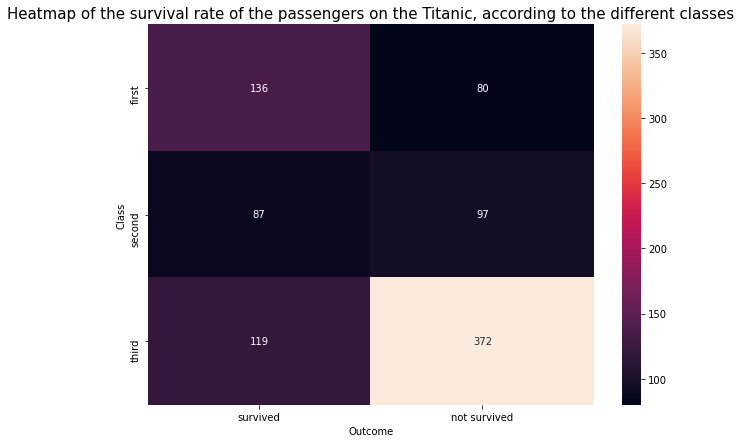

In [10]:
#after creating the lists of the values, we can finally plot the heatmap

classes_survival = [[first_survived, first_not_survived], [second_survived, second_not_survived], [third_survived, third_not_survived]]
x_axis_labels = ['survived', 'not survived']
y_axis_labels = ['first', 'second', 'third']

plt.subplots(figsize=(10,7))
p1 = sns.heatmap(classes_survival, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt="d")

plt.ylabel('Class')
plt.xlabel('Outcome')
plt.title('Heatmap of the survival rate of the passengers on the Titanic, according to the different classes', fontsize=15)
plt.show()

## 3rd exercise

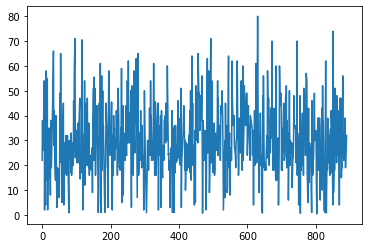

In [11]:
#for the next exercise, since the age distribution is needed, I'll remove all the rows from the dataset, where the age is nan
#first we have to find the nan values

list_of_nan_age = []

for i in range(0,len(data)):
    if age[i] == -999:
        list_of_nan_age.append(i)

        
#now we can remove them from the dataset

data_removed_age = data.drop(list_of_nan_age)

#we can  check if we removed all the nan (-999) values correctly with plotting the ages:

plt.plot(data_removed_age.iloc[:, 5])

In [12]:
#let's separate the data according to the classes

survived_removed_age = list(data_removed_age.iloc[:, 1])
pcclass_removed_age = list(data_removed_age.iloc[:, 2])
age_removed_age = list(data_removed_age.iloc[:, 5])
fare_removed_age = list(data_removed_age.iloc[:, 9])

first_age_list = []
second_age_list = []
third_age_list = []

#We have to count the different elements in the lists

for i in range(0,len(data_removed_age)):
    if pcclass_removed_age[i] == 1:
        first_age_list.append(age_removed_age[i])
    if pcclass_removed_age[i] == 2:
        second_age_list.append(age_removed_age[i])
    if pcclass_removed_age[i] == 3:
        third_age_list.append(age_removed_age[i])


#let's check again, if we worked correctly
        
total_passengers = len(first_age_list) + len(second_age_list) + len(third_age_list)
if total_passengers == len(data_removed_age):
    print('True')

True


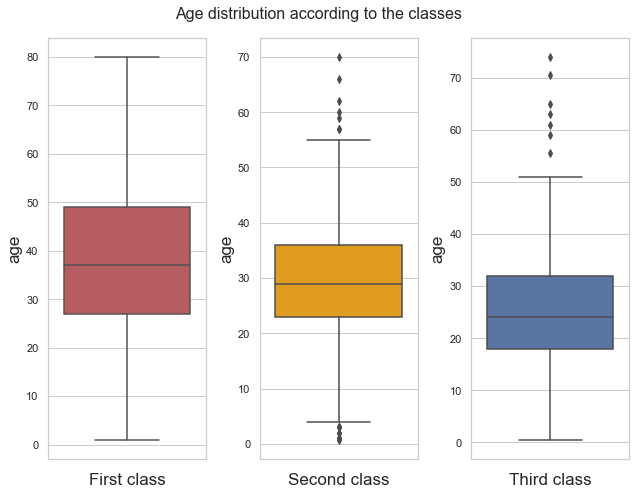

In [13]:
#now we have three lists containing all the ages according to the classes
#let's create the boxplots!

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
f, axes = plt.subplots(1, 3, figsize=(9,7))

sns.boxplot(y=first_age_list, orient='v', color = 'r', ax=axes[0])
axes[0].set_xlabel('First class', fontsize=17)
sns.boxplot(y=second_age_list, orient='v', color = 'orange', ax=axes[1])
axes[1].set_xlabel('Second class', fontsize=17)
sns.boxplot(y=third_age_list, orient='v', color = 'b', ax=axes[2])
axes[2].set_xlabel('Third class', fontsize=17)

for ax in axes.flat:
    ax.set(ylabel='age')
    ax.yaxis.label.set_size(17)

f.suptitle('Age distribution according to the classes', fontsize=16) 
f.tight_layout()
plt.show()

## 4th exercise

In [14]:
#in this exercise, we will calcualte the correlation matrix for the numerical columns
#we are using the removed_age dataset for the calcualtions
                        
data_removed_non_numerical = data_removed_age.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

#checking if we worked correctly

data_removed_non_numerical.head()

#numpy.corrcoef()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
#creating the correlation matrix and converting it to numpy array

correlation_matrix_pandas = data_removed_non_numerical.corr()
correlation_matrix = correlation_matrix_pandas.to_numpy()

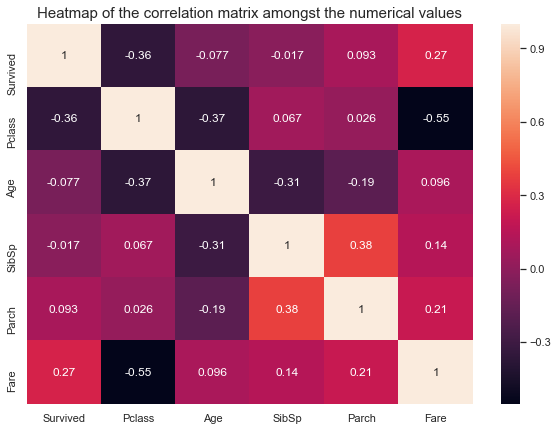

In [16]:
#creating the heatmap

x_axis_labels = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
y_axis_labels = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.subplots(figsize=(10,7))
p1 = sns.heatmap(correlation_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True)

plt.title('Heatmap of the correlation matrix amongst the numerical values', fontsize=15)
plt.show()

## 5th exercise

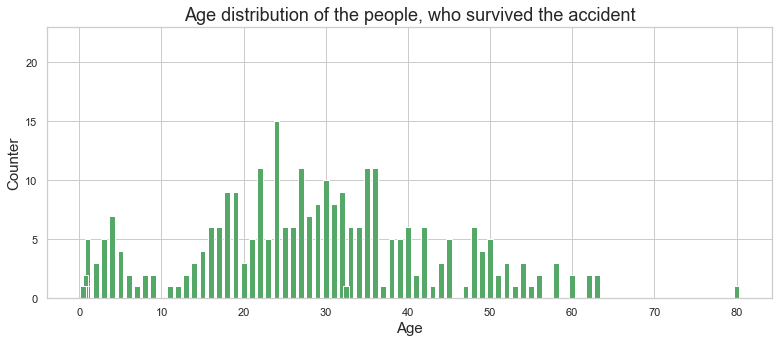

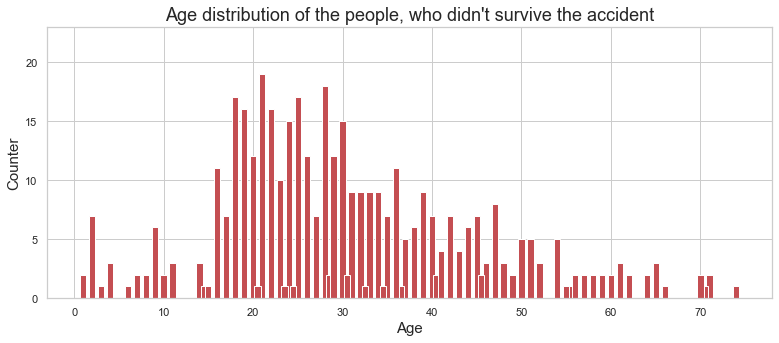

In [17]:
#First of all, let's look at the age distribution of the people who survived and who didn't

didnt_survive_age = []
survived_age = []

for i in range(0,len(data_removed_age)):
    if survived_removed_age[i] == 0:
        didnt_survive_age.append(age_removed_age[i])
    elif survived_removed_age[i] == 1:
        survived_age.append(age_removed_age[i])
        
survived_dict = {i:survived_age.count(i) for i in survived_age}
didnt_survive_dict = {i:didnt_survive_age.count(i) for i in didnt_survive_age}

my_dict = [survived_dict, didnt_survive_dict]
colours = ['g', 'r']
titles = ["Age distribution of the people, who survived the accident", "Age distribution of the people, who didn't survive the accident"]

for i in range(0,len(my_dict)):
    plt.subplots(figsize=(13,5))
    plt.bar(my_dict[i].keys(), my_dict[i].values(), width = 0.7, color=colours[i])
    plt.ylim(0,23)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel('Counter', fontsize = 15)
    plt.title(titles[i], fontsize = 18)
    
#As it's seen, a lot more people didn't survive the accident than the ones, who did
#According to the graphs, lots of young children (between the age of 0 and 10) survived. This might be due to the fact that
#they were rescued on the safety boats
#luckily, there was an 80 year old person, who survived 

In [43]:
#In the last part of this exercise, let's check the age distribution of the ticket fares!
#for this purpose, we have to sort the data in increasing order:

data_age_fare = data_removed_non_numerical.drop(['Survived', 'Pclass', 'SibSp', 'Parch'], axis=1)
data_age_fare = data_age_fare.sort_values(by=['Age'])
data_age_fare

,Age,Fare
803,0.42,8.5167
755,0.67,14.5000
644,0.75,19.2583
469,0.75,19.2583
78,0.83,29.0000
...,...,...
116,70.50,7.7500
493,71.00,49.5042
96,71.00,34.6542
851,74.00,7.7750


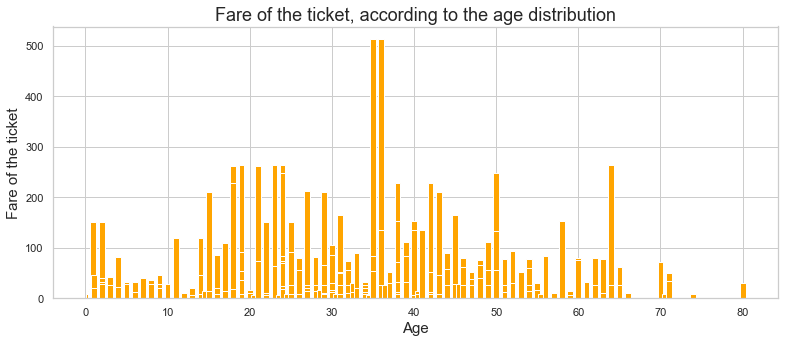

In [89]:
#let's plot the results:

plt.subplots(figsize=(13,5))
plt.bar(data_age_fare['Age'], data_age_fare['Fare'], width = 0.7, color='orange')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Fare of the ticket', fontsize = 15)
plt.title('Fare of the ticket, according to the age distribution', fontsize = 18)
plt.show()

In [64]:
#this is not the best representation of the prices, since there might be some outliners, which causes the smaller values not to be seen
#let's take the mean value of the prices for this reason:
#first we need them sorted:

sorted_age = list(data_age_fare['Age'])
sorted_fare = list(data_age_fare['Fare'])

#creating some lists

separated_ages = []
separated_fares = []
list_of_same_fares = []
list_of_same_ages = []

#the following collects the fares according to the same ages to lists

for i in range(1,len(data_age_fare)):
    if sorted_age[i-1] == sorted_age[i]:
        list_of_same_fares.append(sorted_fare[i-1])
    else:
        separated_ages.append(sorted_age[i-1])
        list_of_same_fares.append(sorted_fare[i-1])
        separated_fares.append(list_of_same_fares)
        list_of_same_fares = []

#we need to add the last elements manually        

separated_fares.append(sorted_fare[len(data_age_fare)-1])
separated_ages.append(sorted_age[len(data_age_fare)-1])

In [85]:
#now we need to take the mean value of the added lists

mean_fares = []

for i in range(0,len(separated_fares)-1):
    mean_fares_single = sum(separated_fares[i])/len(separated_fares[i])
    mean_fares.append(mean_fares_single)
    
mean_fares.append(sorted_fare[len(data_age_fare)-1])

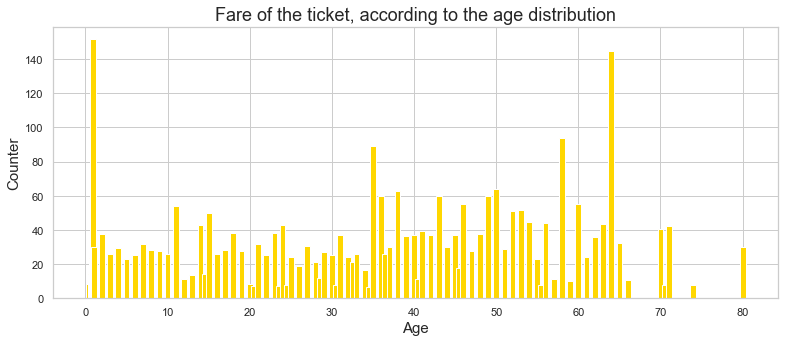

In [91]:
#now, that we are finally done, let's create the same plot, as some cells above

plt.subplots(figsize=(13,5))
plt.bar(separated_ages, mean_fares, width = 0.7, color='gold')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Counter', fontsize = 15)
plt.title('Fare of the ticket, according to the age distribution', fontsize = 18)
plt.show()

In [95]:
#now, that we sucessfully took the average of the prices according to the ages, let's compare the maximum values in the two dataset:

print("The maximum value, when we didn't take the average: ", np.max(data_age_fare['Fare']), 'dollars.')
print("The maximum value, when we took the average: ", np.max(mean_fares), 'dollars.')

The maximum value, when we didn't take the average:  512.3292 dollars.
The maximum value, when we took the average:  151.55 dollars.


In [ ]:
#as it's seen, only from the first dataset we couldn't conclude that middle-aged people buy more expensive tickets,
#since there were some outliers.
#from the averaged datest we can say, that people around the age of 35-60 bought the most expensive tickets
#we can see that there are two outliers, which are probably resulted from having only one or two people in that age group,
#who bought very expensive tickets.